In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec 
import seaborn as sns
import numpy as np
%matplotlib inline

sns.set_palette('pastel')

## Cargar los datos

In [1]:
df = pd.read_csv('data/train_data.csv', sep=';')
df.sample(10)

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil,abandono_6meses
2138,104087,102140.0,1,Presencial,2.700,8,Mujer,Linkedin,6,18/12/1990,293621,NaN,72,1/12/2023,Soltero,0
1249,100089,102061.0,1,Presencial,2.310,0,Hombre,Headhunter,8,23/12/1990,291776,75.0,77,21/06/2015,Casado,0
456,101307,102036.0,1,Híbrida,1.420,9,Hombre,Portal Web,14,27/11/1971,662375,44.0,73,30/10/2012,Divorciado,1
1704,103193,102134.0,1,Presencial,1.470,2,Hombre,Portal Web,5,25/02/1993,229407,43.0,79,24/07/2021,Soltero,1
1304,101001,102036.0,1,Presencial,1.965,10,Hombre,Linkedin,5,20/05/1989,310202,70.0,75,2/02/2014,Casado,0
907,102000,NaN,2,Presencial,1.900,0,Hombre,Ferias & Networking,7,11/03/1969,1616000,90.0,70,25/02/2023,Soltero,0
593,103823,102016.0,1,Híbrida,2.940,8,Hombre,Portal Web,3,4/09/1987,348077,18.0,75,3/02/2013,Casado,1
1317,100820,102114.0,1,Presencial,3.435,7,Hombre,Portal Web,4,31/03/1972,875304,69.0,75,18/09/2020,Casado,0
509,103320,102063.0,1,Híbrida,3.115,4,Hombre,Portal Web,9,25/02/1971,878932,40.0,66,30/07/2017,Casado,1
938,103423,102052.0,1,Presencial,1.900,8,Mujer,Portal Web,5,3/02/1994,210229,90.0,76,21/11/2014,Casado,0


## Descripcion de los datos

- Tamaño del dataset
- Tipos de datos de las variables
- Datos faltantes y duplicados
- Medidas de tendencia central y dispercion

In [2]:
df.shape

(2152, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152 entries, 0 to 2151
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_colaborador        2152 non-null   int64  
 1   id_ultimo_jefe        2061 non-null   float64
 2   seniority             2152 non-null   int64  
 3   modalidad_trabajo     2152 non-null   object 
 4   distancia_oficina     2152 non-null   float64
 5   dias_baja_salud       2152 non-null   int64  
 6   genero                2152 non-null   object 
 7   canal_reclutamiento   2152 non-null   object 
 8   permanencia_promedio  2152 non-null   int64  
 9   fecha_nacimiento      2152 non-null   object 
 10  salario               2152 non-null   int64  
 11  performance_score     2084 non-null   float64
 12  psi_score             2152 non-null   int64  
 13  fecha_incorporacion   2152 non-null   object 
 14  estado_civil          2152 non-null   object 
 15  abandono_6meses      

In [4]:
# Numeros de datos faltantes
df.isnull().sum()

id_colaborador           0
id_ultimo_jefe          91
seniority                0
modalidad_trabajo        0
distancia_oficina        0
dias_baja_salud          0
genero                   0
canal_reclutamiento      0
permanencia_promedio     0
fecha_nacimiento         0
salario                  0
performance_score       68
psi_score                0
fecha_incorporacion      0
estado_civil             0
abandono_6meses          0
dtype: int64

In [5]:
# Numero de registros duplicados en el dataset
df.duplicated().sum()

0

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_colaborador,2152.0,102070.160781,1210.999342,100001.00,101028.75000,102048.50,103135.50000,104171.00
id_ultimo_jefe,2061.0,102090.326055,43.586010,102000.00,102054.00000,102091.00,102127.00000,102172.00
seniority,2152.0,1.042286,0.201288,1.00,1.00000,1.00,1.00000,2.00
distancia_oficina,2152.0,3.111768,1.789050,0.12,1.81875,2.51,4.15125,21.05
dias_baja_salud,2152.0,2.709108,2.982975,0.00,1.00000,2.00,3.00000,35.00
permanencia_promedio,2152.0,6.644981,4.283794,1.00,3.00000,6.00,9.00000,25.00
salario,2152.0,457021.147305,302943.505466,76521.00,260439.75000,373422.50,674193.00000,1900000.00
performance_score,2084.0,63.472169,23.110594,5.00,42.00000,65.00,90.00000,99.00
psi_score,2152.0,75.286245,6.050987,58.00,71.00000,75.00,79.00000,98.00
abandono_6meses,2152.0,0.466078,0.498964,0.00,0.00000,0.00,1.00000,1.00


In [7]:
df.describe(include='object').T

,count,unique,top,freq
modalidad_trabajo,2152,2,Presencial,1530
genero,2152,2,Hombre,1095
canal_reclutamiento,2152,5,Portal Web,986
fecha_nacimiento,2152,1980,24/11/1978,3
fecha_incorporacion,2152,1595,3/10/2013,5
estado_civil,2152,4,Soltero,925


In [8]:
# Numero de valores unicos por columna
df.nunique()

id_colaborador          2152
id_ultimo_jefe           171
seniority                  2
modalidad_trabajo          2
distancia_oficina        931
dias_baja_salud           19
genero                     2
canal_reclutamiento        5
permanencia_promedio      24
fecha_nacimiento        1980
salario                 2081
performance_score         90
psi_score                 38
fecha_incorporacion     1595
estado_civil               4
abandono_6meses            2
dtype: int64

## Analisis de variables

- Variable target
- Variables numericas
- Correlacion entre variables numericas
- Relacion con la variable target

In [9]:
def prep_analysis(df, cols, dates):
    """Preprocesa los datos para hacer posible el analisis"""
    
    for col in cols:
        df[col] = df[col].fillna(0)
        df[col] = df[col].astype(int)

    for date in dates:
        df[date] = pd.to_datetime(df[date], dayfirst=True)

    return df

In [10]:
# Crear una copia del dataset original y dropear id_colaborador
df_analysis = df.drop(['id_colaborador'], axis=1)

In [11]:
# Hacer prepocesamiento a los datos para el analisis
df_analysis = prep_analysis(df_analysis, ['id_ultimo_jefe', 'performance_score'], ['fecha_nacimiento', 'fecha_incorporacion'])
df_analysis.dtypes

id_ultimo_jefe                   int64
seniority                        int64
modalidad_trabajo               object
distancia_oficina              float64
dias_baja_salud                  int64
genero                          object
canal_reclutamiento             object
permanencia_promedio             int64
fecha_nacimiento        datetime64[ns]
salario                          int64
performance_score                int64
psi_score                        int64
fecha_incorporacion     datetime64[ns]
estado_civil                    object
abandono_6meses                  int64
dtype: object

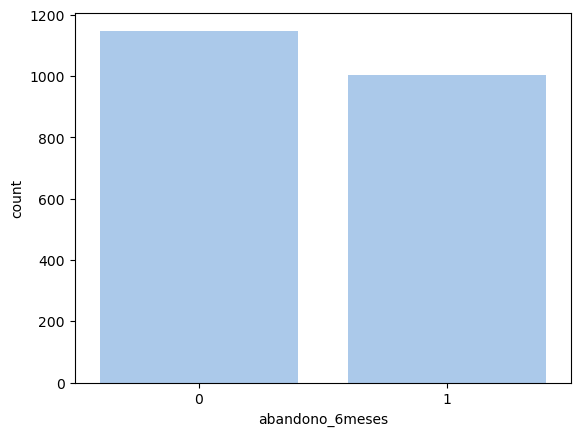

In [12]:
# Target distribution
sns.countplot(data=df_analysis, x='abandono_6meses')
plt.show()

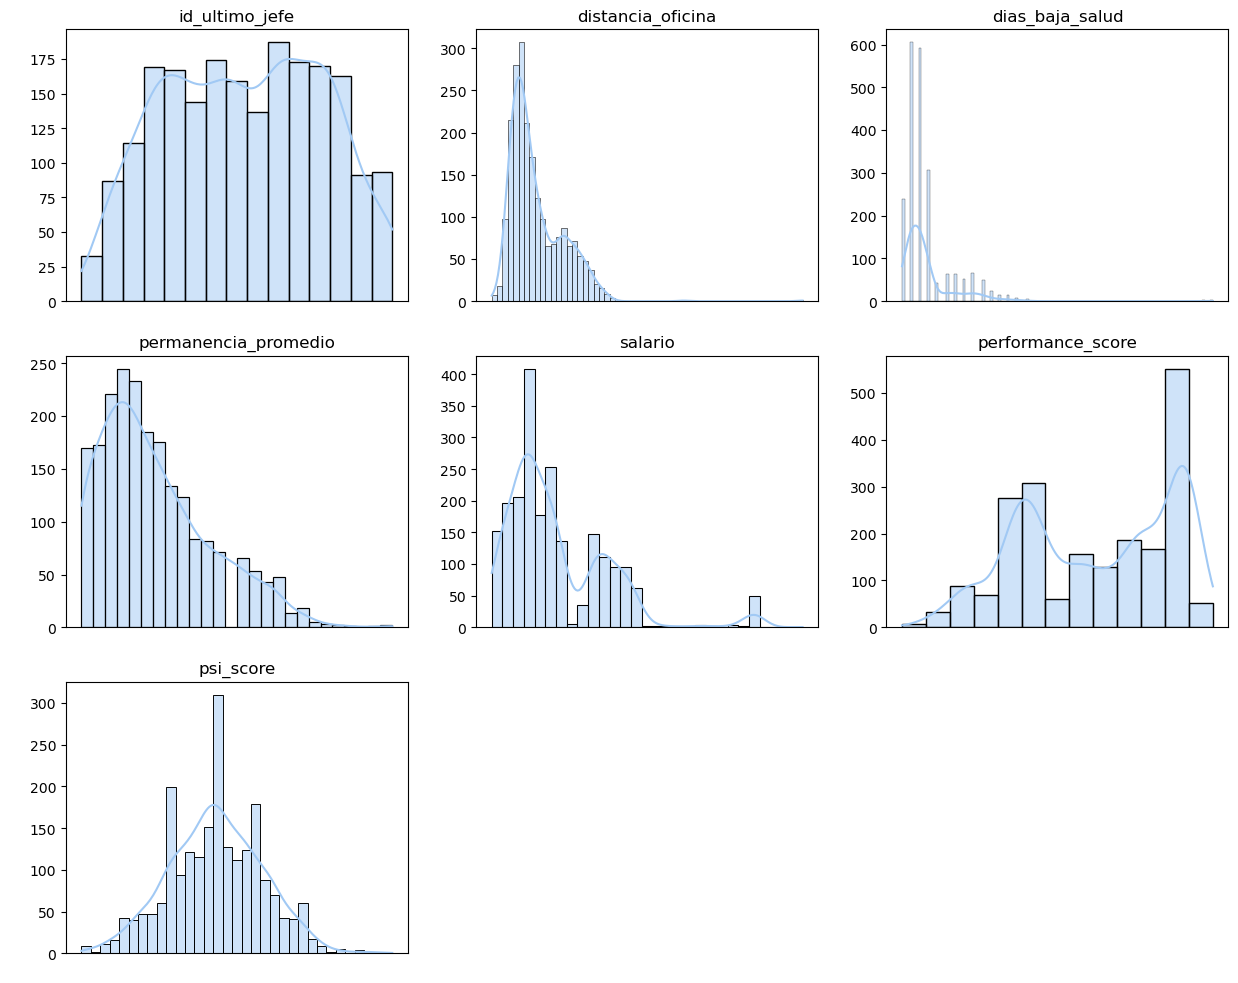

In [24]:
# Seleccionar variables numericas
num_cols = [cname for cname in df_analysis.columns if df_analysis[cname].dtype in ['int', 'float']]
num_cols.remove('seniority')
num_cols.remove('abandono_6meses')

# Mostrar distribucion para cada variable numerica
plt.figure(figsize=(15, 12))
grid = gridspec.GridSpec(3, 3)

for idx, col in enumerate(num_cols):
    ax = plt.subplot(grid[idx])
    sns.histplot(x=col, data=df, kde=True)
    # Ajustes de las graficas
    ax.set_xlabel(" ")
    ax.set_ylabel(" ")
    ax.set_title(f"{col}")
    ax.set_xticks([])

plt.show()

<Axes: xlabel='seniority', ylabel='count'>

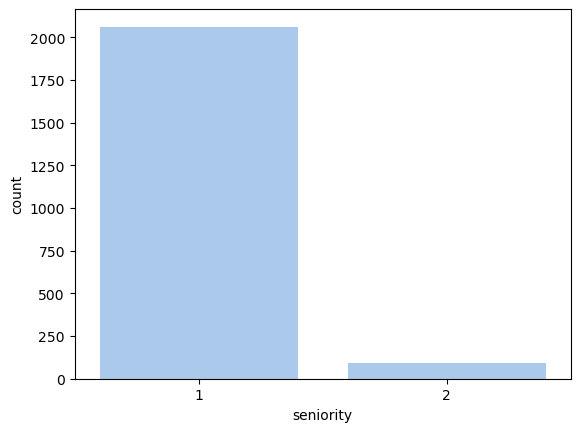

In [14]:
sns.countplot(data=df_analysis, x='seniority')

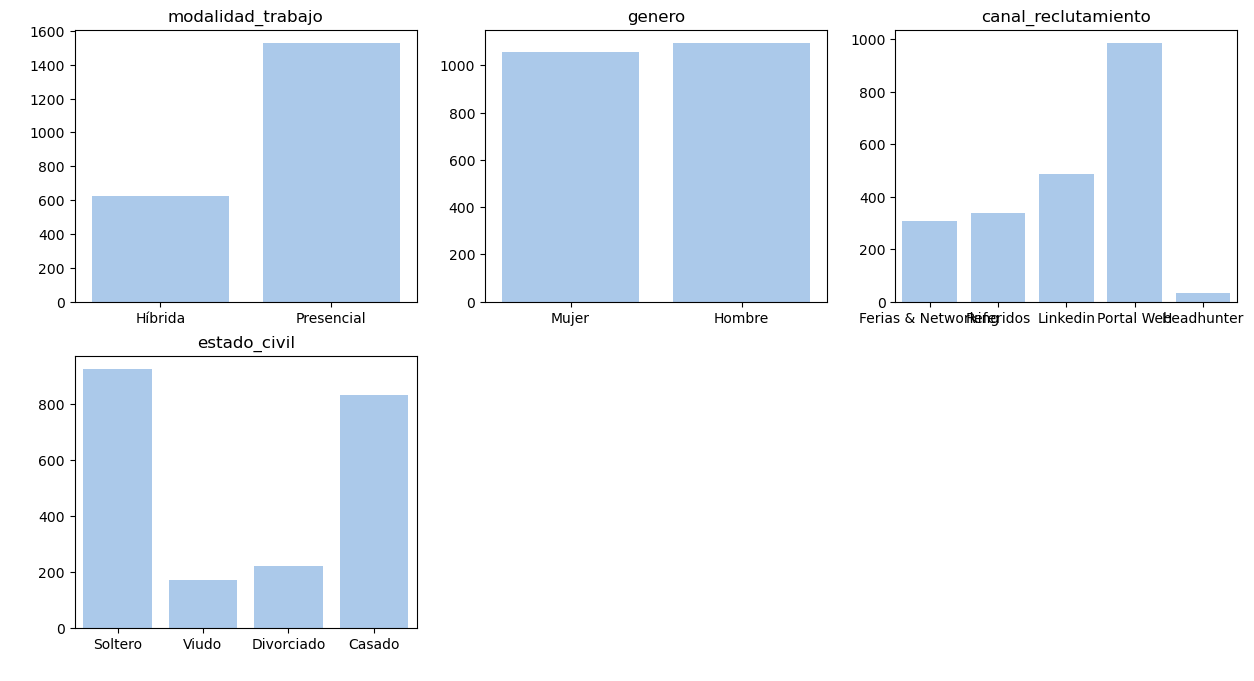

In [15]:
# Seleccionar variables numericas
cat_cols = [cname for cname in df_analysis.columns if df_analysis[cname].dtype in ['object']]

# Mostrar distribucion para cada variable numerica
plt.figure(figsize=(15, 12))
grid = gridspec.GridSpec(3, 3)

for idx, col in enumerate(cat_cols):
    ax = plt.subplot(grid[idx])
    sns.countplot(x=col, data=df)
    # Ajustes de las graficas
    ax.set_xlabel(" ")
    ax.set_ylabel(" ")
    ax.set_title(f"{col}")

plt.show()

## Relacion entre Variables

In [16]:
corr_matrix = df_analysis.corr(numeric_only=True)

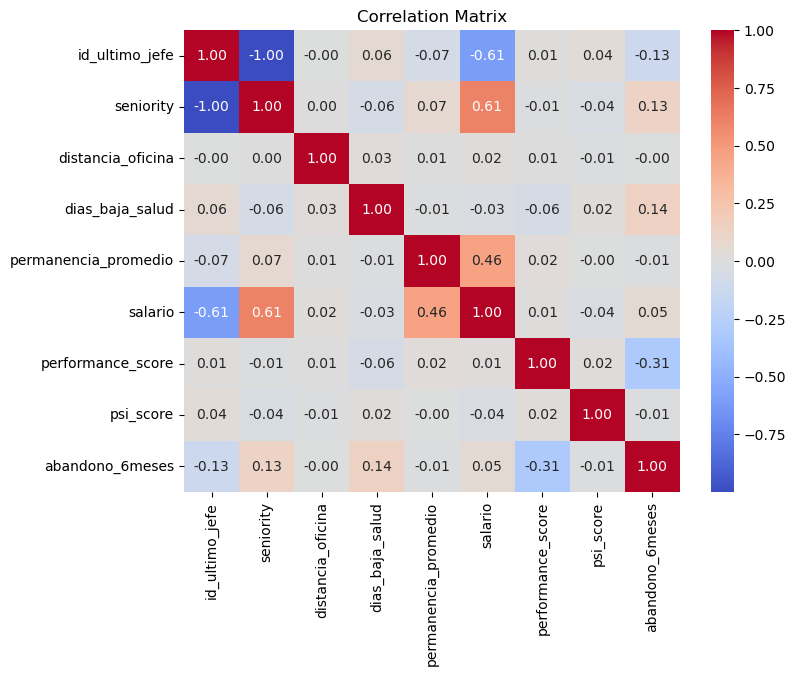

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

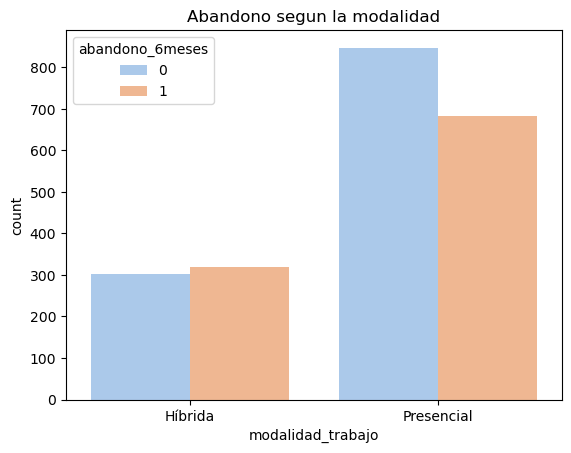

In [18]:
sns.countplot(df_analysis, x='modalidad_trabajo', hue='abandono_6meses')
plt.title('Abandono segun la modalidad')
plt.show()

<Axes: xlabel='modalidad_trabajo', ylabel='dias_baja_salud'>

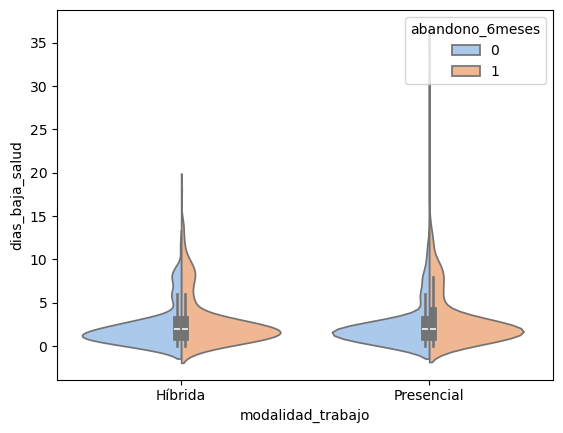

In [19]:
sns.violinplot(df_analysis, x='modalidad_trabajo', y='dias_baja_salud', hue='abandono_6meses', split=True)

<Axes: xlabel='psi_score', ylabel='dias_baja_salud'>

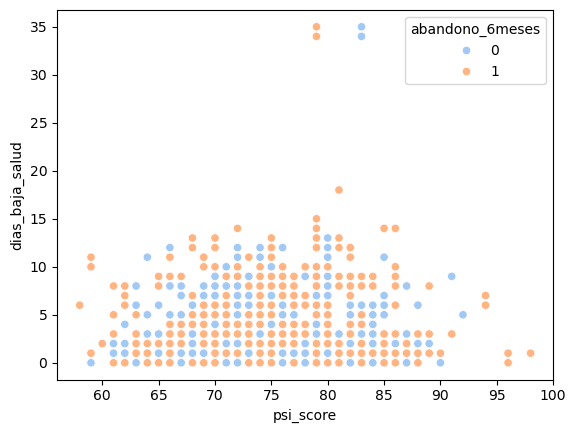

In [20]:
sns.scatterplot(df_analysis, x='psi_score', y='dias_baja_salud', hue='abandono_6meses')

<Axes: xlabel='modalidad_trabajo', ylabel='distancia_oficina'>

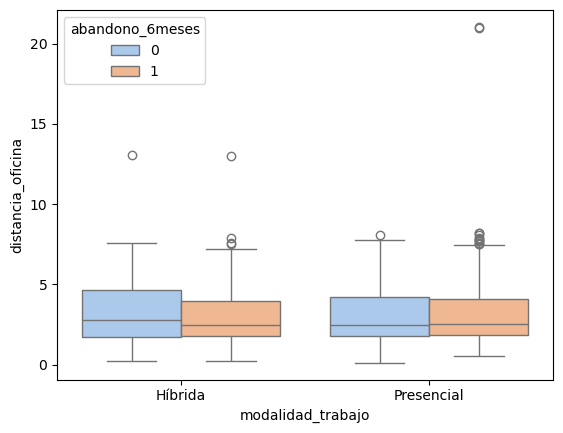

In [21]:
sns.boxplot(df_analysis, x='modalidad_trabajo', y='distancia_oficina', hue='abandono_6meses')

<Axes: xlabel='genero', ylabel='salario'>

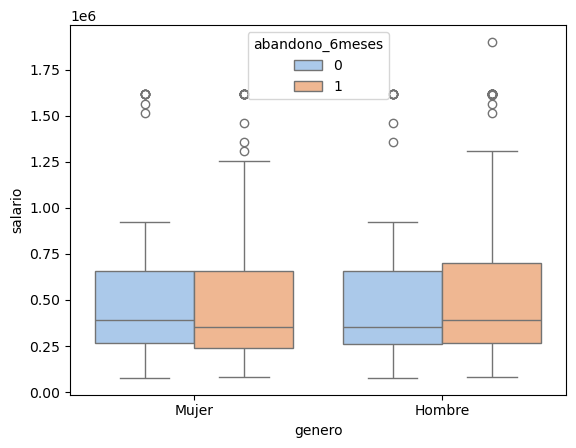

In [22]:
sns.boxplot(df_analysis, x='genero', y='salario', hue='abandono_6meses')

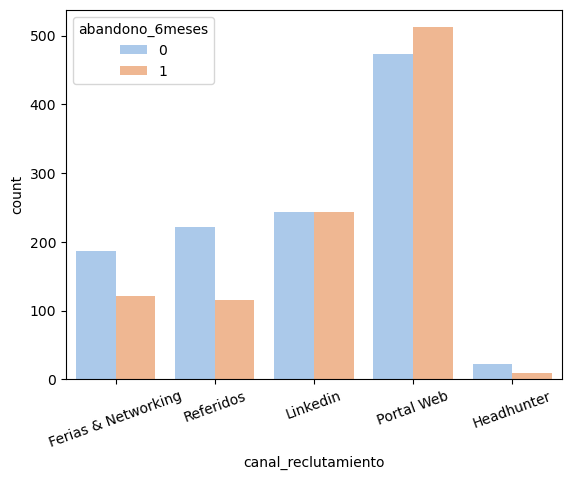

In [23]:
sns.countplot(df_analysis, x='canal_reclutamiento', hue='abandono_6meses')
plt.xticks(rotation=20)
plt.show()